## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
linear_regression_data = np.genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [ ]:
#print(linear_regression_data.round(2))
linear_regression_data = linear_regression_data.round(2)
linear_regression_data

array([[2.9, 4. ],
       [6.7, 7.4],
       [4.9, 5. ],
       [7.9, 7.2],
       [9.8, 7.9],
       [6.9, 6.1],
       [6.1, 6. ],
       [6.2, 5.8],
       [6. , 5.2],
       [5.1, 4.2],
       [4.7, 4. ],
       [4.4, 4.4],
       [5.8, 5.2]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [ ]:
X = linear_regression_data[:,0]
y = linear_regression_data[:,1]

#### Explore your data

In [ ]:
X

array([2.9, 6.7, 4.9, 7.9, 9.8, 6.9, 6.1, 6.2, 6. , 5.1, 4.7, 4.4, 5.8])

In [ ]:
y

array([4. , 7.4, 5. , 7.2, 7.9, 6.1, 6. , 5.8, 5.2, 4.2, 4. , 4.4, 5.2])

#### Plot the original data (scatter plot of X,y)

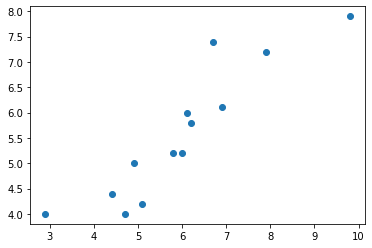

In [ ]:
plt.scatter(X,y)

## LR Full Implementation

In [ ]:
theta_0 = 0
theta_1 = 0
LEARNING_RATE = 0.01
array_length = X.size
array_length

13

In [ ]:
for i in range(10):
  y_predicted = [(theta_0 + theta_1*point) for point in X ]
  distance = y_predicted - y
  squared_distance = [value**2 for value in distance]
  cost = np.sum(squared_distance)/(2*array_length)
  temp_theta_0 = theta_0 - (LEARNING_RATE * (np.sum(distance)/array_length))
  theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
  temp_theta_1 = theta_1 - (LEARNING_RATE * (np.sum(theta_1_cost)/array_length))
  theta_0 = temp_theta_0
  theta_1 = temp_theta_1

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [ ]:
y_predicted = [(theta_0 + theta_1*point) for point in X ]

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

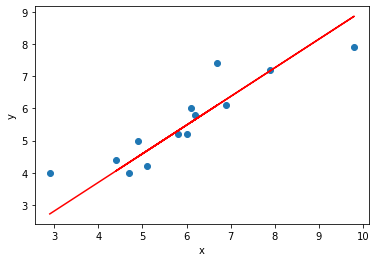

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_predicted, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Use R2 score to evaluate LR equation output

https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_predicted)

0.7466463473545889

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

In [ ]:
X_new = np.array([np.ones(len(X)), X.flatten()]).T
y_new = y.reshape(len(y), 1)
thetas = np.ones((2,1))
costs = []
#np.dot(thetas, temp_x)
for i in range(5):
  loss = X_new.dot(thetas)- y_new
  gradients = X_new.T.dot(loss)
  costs.append(np.sum(loss**2))
  thetas = thetas - (gradients*LEARNING_RATE* (1/array_length))
h = X_new.dot(thetas)


#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

In [ ]:
r2_score(y_new, h)

0.8020195235465319

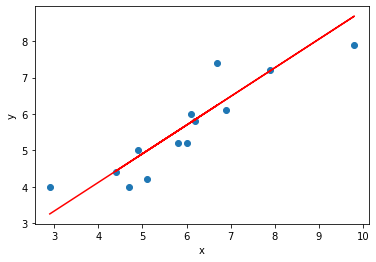

In [ ]:
plt.scatter(X,y_new)
plt.plot(X, h, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Plot loss vs. iterations

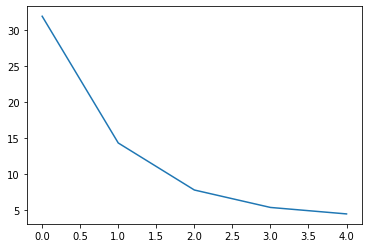

In [ ]:
plt.plot(np.arange(5), list(costs))

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [5]:
data = np.genfromtxt('MultipleLR.csv', delimiter=',')
data = data.round(2)
x_multi = data[:,:3]
y_multi = data[:, -1]

### Repeat your implementation but for more than one variable


In [8]:
X_new = np.insert(x_multi, 0, np.ones(len(x_multi)), axis=1)
thetas = np.ones(4)
costs = []
LEARNING_RATE = 0.0001
for i in range(100):
  predictions = X_new.dot(thetas)
  errors = np.subtract(predictions, y_multi)
  costs.append(np.sum(errors**2))
  gradient = (LEARNING_RATE / x_multi.shape[0]) * X_new.transpose().dot(errors);
  thetas = thetas - gradient

h = X_new.dot(thetas)
r2_score(y_multi, h)

0.9782753172900831

### Plot loss vs. iterations

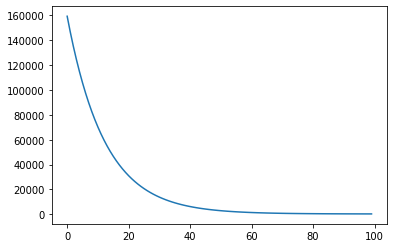

In [ ]:
plt.plot(np.arange(100), list(costs))

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [ ]:
X = linear_regression_data[:,0]
y = linear_regression_data[:,1]

#### Train the model (fit the model to the training data)

In [ ]:
reg = model.fit(X.reshape(1,-1),y.reshape(1,-1))

#### Predict y values using the trained model

In [ ]:
y_pred = reg.predict(X.reshape(1,-1))

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

In [ ]:
r2_score(y,y_pred.reshape(-1,1))

1.0

### Repeat for Mulivariate

In [ ]:
x_multi = data[:,:3]
y_multi = data[:, -1]
model = linear_model.LinearRegression()
reg = model.fit(x_multi, y_multi)
reg.predict(x_multi)
reg.score(x_multi, y_multi)


0.9896615789448399